# OMJL Tutorial - MODPROD 2026

**OpenModelica.jl: A Julia-based Modelica Compiler**

Welcome to this interactive tutorial! We will cover:

1. **Modelica Basics** - Core modeling concepts (~20 min)
2. **Julia-Modelica Integration** - Scripting and analysis (~20 min)
3. **Language Extensions** - Variable-structure systems (~20 min)

In [7]:
println("Hello Julia!"); println("Hello Modelica!") println("Good Morning!")

Hello Julia!
Hello Modelica!


## Setup

First, let us load the required packages. Note that this may take a while if this is the first time you are running Julia.

In [8]:
@info "Loading OM..."
using OM                    # High-level API
@info "Loading OMFrontend..."
using OMFrontend            # Frontend (parsing, flattening)
@info "Loading OMBackend..."
using OMBackend             # Backend (code generation)
@info "Loading DifferentialEquations..."
using DifferentialEquations
@info "Loading Plots..."
using Plots
@info "All packages loaded!"

[ Info: Loading OM...
[ Info: Loading OMFrontend...
[ Info: Loading OMBackend...
[ Info: Loading DifferentialEquations...
[ Info: Loading Plots...
[ Info: All packages loaded!


---
# Part 1: Modelica Basics

Modelica is an equation-based, object-oriented language for modeling physical systems. In this section, we will learn the fundamental concepts.

## 1.1 Hello World - Your First Model

The simplest Modelica model: exponential decay.

```modelica
model HelloWorld
  Real x(start = 1.0);
  parameter Real a = 1.0;
equation
  der(x) = -a * x;
end HelloWorld;
```

**Key concepts:**
- `Real x(start = 1.0)` - A continuous variable with initial value
- `parameter Real a` - A constant that can be changed before simulation
- `der(x)` - The time derivative of x
- `equation` section - Where we define the mathematical relationships

In [9]:
helloworld_model = """
model HelloWorld
  Real x(start = 1.0);
  parameter Real a = 1.0;
equation
  der(x) = -a * x;
end HelloWorld;
"""

"model HelloWorld\n  Real x(start = 1.0);\n  parameter Real a = 1.0;\nequation\n  der(x) = -a * x;\nend HelloWorld;\n"

### Compiling and Simulating

OMJL compiles Modelica to Julia code, which can then be simulated using DifferentialEquations.jl.

┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/utils.jl:121


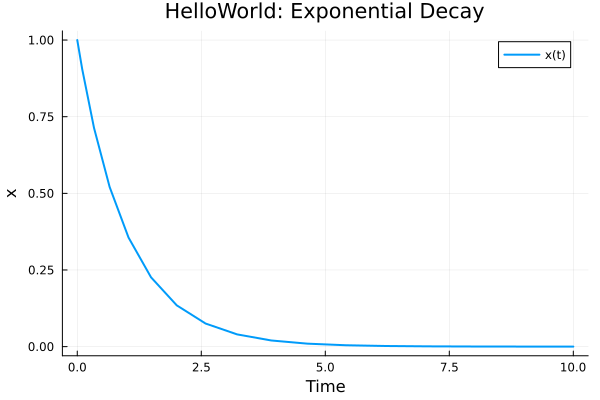

In [10]:
# Compile and simulate HelloWorld using OMJL
helloworld_path = joinpath(@__DIR__, "..", "models", "HelloWorld.mo")

# One-step compile and simulate
sol_hello = OM.simulate(
    "HelloWorld",           # Model name
    helloworld_path;        # Path to .mo file
    stopTime = 10.0,        # Simulation end time
    solver = Rodas5(autodiff = false)  # Solver for stiff systems
)

# Plot the result
plot(sol_hello.t, sol_hello[:x],
    xlabel = "Time", ylabel = "x",
    title = "HelloWorld: Exponential Decay",
    label = "x(t)", linewidth = 2)

## 1.2 The Van der Pol Oscillator

A classic example of a nonlinear oscillator with coupled equations.

```modelica
model VanDerPol
  Real x(start = 1.0);
  Real y(start = 1.0);
  parameter Real lambda = 0.3;
equation
  der(x) = y;
  der(y) = -x + lambda * (1 - x^2) * y;
end VanDerPol;
```

This demonstrates:
- Multiple state variables
- Coupled differential equations
- Nonlinear terms

In [11]:
vanderpol_model = """
model VanDerPol
  Real x(start = 1.0);
  Real y(start = 1.0);
  parameter Real lambda = 0.3;
equation
  der(x) = y;
  der(y) = -x + lambda * (1 - x^2) * y;
end VanDerPol;
"""

"model VanDerPol\n  Real x(start = 1.0);\n  Real y(start = 1.0);\n  parameter Real lambda = 0.3;\nequation\n  der(x) = y;\n  der(y) = -x + lambda * (1 - x^2) * y;\nend VanDerPol;\n"

┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/utils.jl:121


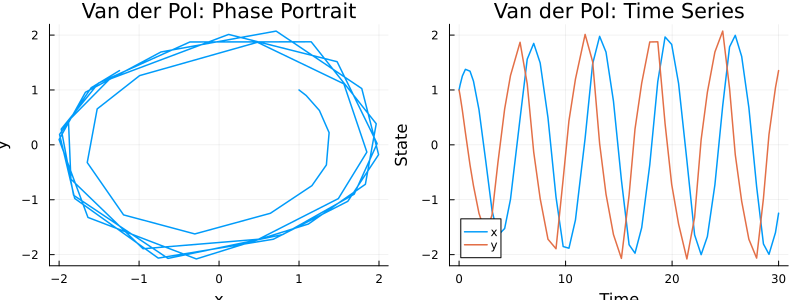

In [12]:
# Simulate Van der Pol oscillator
vanderpol_path = joinpath(@__DIR__, "..", "models", "VanDerPol.mo")

sol_vdp = OM.simulate(
    "VanDerPol",
    vanderpol_path;
    stopTime = 30.0,
    solver = Tsit5()
)

# Phase portrait and time series
p1 = plot(sol_vdp[:x], sol_vdp[:y],
    xlabel = "x", ylabel = "y",
    title = "Van der Pol: Phase Portrait",
    label = nothing, linewidth = 1.5)

p2 = plot(sol_vdp.t, [sol_vdp[:x] sol_vdp[:y]],
    xlabel = "Time", ylabel = "State",
    title = "Van der Pol: Time Series",
    label = ["x" "y"], linewidth = 1.5)

plot(p1, p2, layout = (1, 2), size = (800, 300))

## 1.3 Ecological Modeling: Lotka-Volterra

The predator-prey model demonstrates how Modelica can describe biological systems.

```modelica
model LotkaVolterra "Predator-prey dynamics"
  Real x(start = 10) "Prey population";
  Real y(start = 10) "Predator population";
  parameter Real alpha = 0.1 "Prey birth rate";
  parameter Real beta = 0.02 "Predation rate";
  parameter Real delta = 0.02 "Predator growth from predation";
  parameter Real gamma = 0.4 "Predator death rate";
equation
  der(x) = x * (alpha - beta * y);
  der(y) = y * (delta * x - gamma);
end LotkaVolterra;
```

Notice:
- String annotations (`"..."`) document variables and parameters
- Descriptive parameter names make the model self-documenting

┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/utils.jl:121


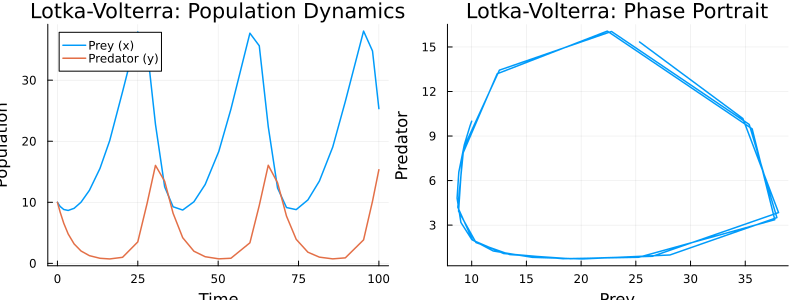

In [13]:
# Simulate Lotka-Volterra predator-prey dynamics
lotkavolterra_path = joinpath(@__DIR__, "..", "models", "LotkaVolterra.mo")

sol_lv = OM.simulate(
    "LotkaVolterra",
    lotkavolterra_path;
    stopTime = 100.0,
    solver = Tsit5()
)

# Population dynamics over time
p_lv1 = plot(sol_lv.t, [sol_lv[:x] sol_lv[:y]],
    xlabel = "Time", ylabel = "Population",
    title = "Lotka-Volterra: Population Dynamics",
    label = ["Prey (x)" "Predator (y)"], linewidth = 1.5)

# Phase portrait showing cyclic behavior
p_lv2 = plot(sol_lv[:x], sol_lv[:y],
    xlabel = "Prey", ylabel = "Predator",
    title = "Lotka-Volterra: Phase Portrait",
    label = nothing, linewidth = 1.5)

plot(p_lv1, p_lv2, layout = (1, 2), size = (800, 300))

## 1.4 Electrical Circuits

Modelica excels at modeling physical systems. Here is an RLC circuit.

```modelica
model SimpleCircuit
  Real i(start = 0) "Current";
  Real u_R "Resistor voltage";
  Real u_L "Inductor voltage";
  Real u_C(start = 0) "Capacitor voltage";
  parameter Real R = 10 "Resistance [Ohm]";
  parameter Real L = 0.1 "Inductance [H]";
  parameter Real C = 0.01 "Capacitance [F]";
  parameter Real V = 5 "Source voltage [V]";
  parameter Real freq = 10 "Frequency [Hz]";
equation
  u_R = R * i;
  u_L = L * der(i);
  der(u_C) = i / C;
  V * sin(2 * 3.14159 * freq * time) = u_R + u_L + u_C;
end SimpleCircuit;
```

┌ Warning: 
│  Assumed starting value of 0.0 for variable: u_R
│ 
│  Assumed starting value of 0.0 for variable: u_L
└ @ OMBackend.CodeGeneration ~/Projects/Julia/OM.jl/OMBackend.jl/src/CodeGeneration/MTK_CodeGeneration.jl:685
┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/utils.jl:121


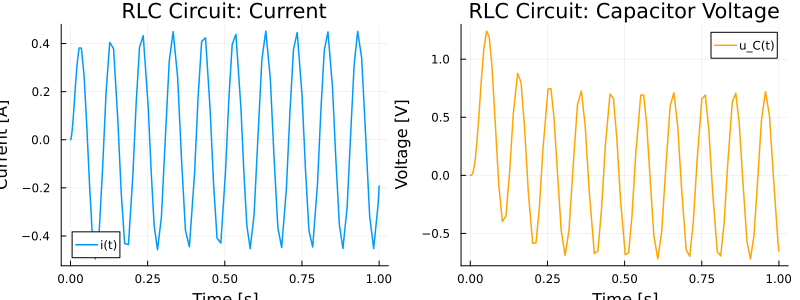

In [14]:
# Simulate RLC circuit
simplecircuit_path = joinpath(@__DIR__, "..", "models", "SimpleCircuit.mo")

sol_circuit = OM.simulate(
    "SimpleCircuit",
    simplecircuit_path;
    stopTime = 1.0,
    solver = Rodas5(autodiff = false)
)

# Plot current and capacitor voltage
p_c1 = plot(sol_circuit.t, sol_circuit[:i],
    xlabel = "Time [s]", ylabel = "Current [A]",
    title = "RLC Circuit: Current",
    label = "i(t)", linewidth = 1.5)

p_c2 = plot(sol_circuit.t, sol_circuit[:u_C],
    xlabel = "Time [s]", ylabel = "Voltage [V]",
    title = "RLC Circuit: Capacitor Voltage",
    label = "u_C(t)", linewidth = 1.5, color = :orange)

plot(p_c1, p_c2, layout = (1, 2), size = (800, 300))

## 1.5 Component-Based Modeling with MSL

The Modelica Standard Library (MSL) provides reusable components. Here is the same RLC circuit using MSL components:

```modelica
model SimpleCircuitMSL
  import Modelica.Electrical.Analog.Basic.Ground;
  import Modelica.Electrical.Analog.Basic.Resistor;
  import Modelica.Electrical.Analog.Basic.Capacitor;
  import Modelica.Electrical.Analog.Basic.Inductor;
  import Modelica.Electrical.Analog.Sources.SineVoltage;

  Resistor R1(R = 10);
  Capacitor C(C = 0.01);
  Resistor R2(R = 100);
  Inductor L(L = 0.1);
  SineVoltage AC(freqHz = 1.0, phase = 1.0);
  Ground G;
equation
  connect(AC.p, R1.p);
  connect(R1.n, C.p);
  connect(C.n, AC.n);
  connect(R1.p, R2.p);
  connect(R2.n, L.p);
  connect(L.n, C.n);
  connect(AC.n, G.p);
end SimpleCircuitMSL;
```

**Key differences from the equation-based version:**
- `import` - Brings in MSL component classes
- Component instantiation with parameters: `Resistor R1(R = 10)`
- `connect(a, b)` - Acausal connections between component ports

  4.061885 seconds (9.57 M allocations: 321.051 MiB, 1.17% gc time, 101.03% compilation time)


┌ Info: Loading MSL
└ 	 Version: MSL:3.2.3
[ Info: Loading MSL..
[ Info: Initial parsing of the MSL...
┌ Warning: 
│  Assumed starting value of 0.0 for variable: R1_v
│ 
│  Assumed starting value of 0.0 for variable: R1_i
│ 
│  Assumed starting value of 0.0 for variable: R1_p_v
│ 
│  Assumed starting value of 0.0 for variable: R1_p_i
│ 
│  Assumed starting value of 0.0 for variable: R1_n_v
│ 
│  Assumed starting value of 0.0 for variable: R1_n_i
│ 
│  Assumed starting value of 0.0 for variable: R1_LossPower
│ 
│  Assumed starting value of 0.0 for variable: R1_R_actual
│ 
│  Assumed starting value of 0.0 for variable: C_i
│ 
│  Assumed starting value of 0.0 for variable: C_p_v
│ 
│  Assumed starting value of 0.0 for variable: C_p_i
│ 
│  Assumed starting value of 0.0 for variable: C_n_v
│ 
│  Assumed starting value of 0.0 for variable: C_n_i
│ 
│  Assumed starting value of 0.0 for variable: R2_v
│ 
│  Assumed starting value of 0.0 for variable: R2_i
│ 
│  Assumed starting value of 0.0 f

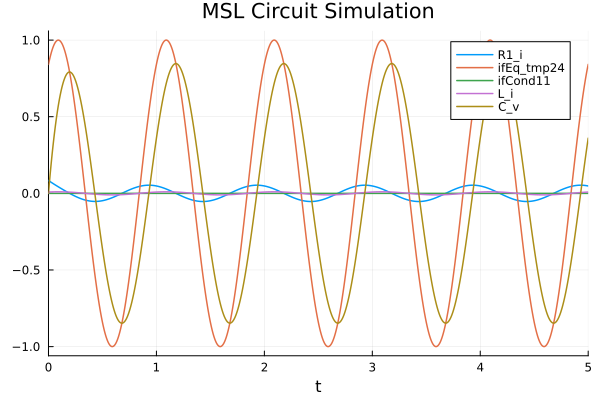

In [15]:
# Simulate MSL-based circuit (requires MSL to be loaded)
simplecircuit_msl_path = joinpath(@__DIR__, "..", "models", "SimpleCircuitMSL.mo")

sol_msl = OM.simulate(
    "SimpleCircuitMSL",
    simplecircuit_msl_path;
    MSL = true,
    MSL_Version = "MSL:3.2.3",
    stopTime = 5.0,
    solver = Rodas5(autodiff = false)
)

plot(sol_msl, title = "MSL Circuit Simulation", linewidth = 1.5)

## 1.6 Hybrid Systems: The Bouncing Ball

Modelica can model discrete events using `when` clauses.

```modelica
model BouncingBall
  parameter Real e = 0.8 "Coefficient of restitution";
  parameter Real g = 9.81 "Gravity";
  Real h(start = 1.0) "Height";
  Real v(start = 0.0) "Velocity";
equation
  der(h) = v;
  der(v) = -g;
  when h <= 0 then
    reinit(v, -e * pre(v));
  end when;
end BouncingBall;
```

Key hybrid modeling constructs:
- `when` - Triggers at discrete events
- `reinit(v, ...)` - Reinitializes a state variable
- `pre(v)` - Value of v just before the event

┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/utils.jl:121


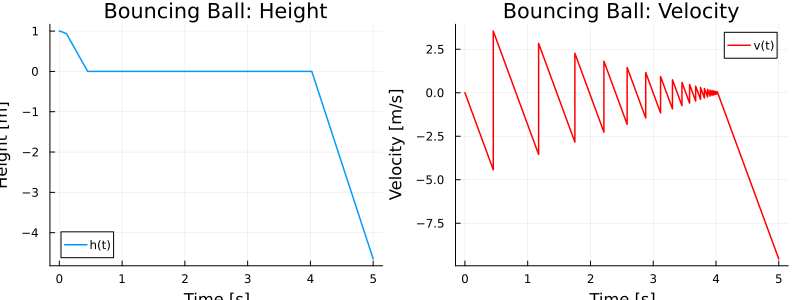

In [16]:
# Simulate bouncing ball (hybrid system with events)
bouncingball_path = joinpath(@__DIR__, "..", "models", "BouncingBall.mo")

sol_ball = OM.simulate(
    "BouncingBall",
    bouncingball_path;
    stopTime = 5.0,
    solver = Rodas5(autodiff = false)
)

# Plot height and velocity
p_b1 = plot(sol_ball.t, sol_ball[:h],
    xlabel = "Time [s]", ylabel = "Height [m]",
    title = "Bouncing Ball: Height",
    label = "h(t)", linewidth = 1.5)

p_b2 = plot(sol_ball.t, sol_ball[:v],
    xlabel = "Time [s]", ylabel = "Velocity [m/s]",
    title = "Bouncing Ball: Velocity",
    label = "v(t)", linewidth = 1.5, color = :red)

plot(p_b1, p_b2, layout = (1, 2), size = (800, 300))

---
# Part 2: Julia-Modelica Integration

One of OMJL's strengths is seamless integration with the Julia ecosystem. In this section, we explore how to combine Modelica models with Julia's powerful tools.

## 2.1 The Compilation Pipeline

OMJL compiles Modelica through several stages:

1. **Parsing** (OMParser.jl) - Modelica source to AST
2. **Frontend** (OMFrontend.jl) - Type checking, flattening, DAE generation
3. **Backend** (OMBackend.jl) - Code generation to Julia

The result is native Julia code that integrates with DifferentialEquations.jl.

### The OMJL API

**High-level (recommended):**
```julia
# One-step compile and simulate
sol = OM.simulate("ModelName", "path/to/model.mo"; stopTime = 10.0)

# Separate compile and simulate
OM.translate("ModelName", "path/to/model.mo")
sol = OM.simulate("ModelName"; stopTime = 10.0)  # Reuse compiled model
```

## 2.2 Parameter Studies

With Julia, we can easily run parameter sweeps and analyze results.

> **Note:** The Julia ODE code below is conceptually equivalent to what OMJL generates when compiling a Modelica model. Unlike API integration approaches (such as OMJulia), OMJL generates native Julia code that integrates directly with the Julia ecosystem. This means you can use Julia's full capabilities for parameter studies, optimization, sensitivity analysis, and machine learning without crossing language boundaries.

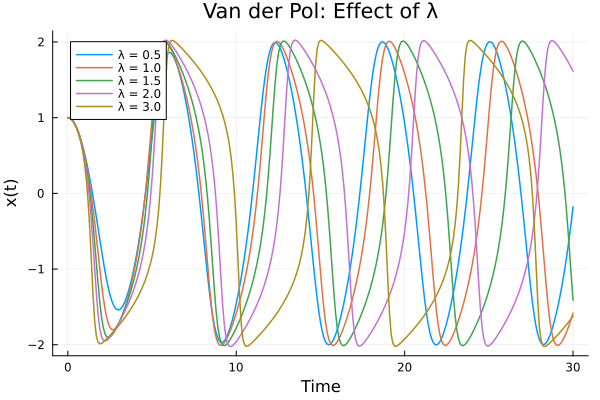

In [17]:
# Parameter sweep example using Julia's ODE solvers
using OrdinaryDiffEq

# Van der Pol ODE (conceptually equivalent to OMJL backend output)
function vdp!(du, u, p, t)
    x, y = u
    λ = p[1]
    du[1] = y
    du[2] = -x + λ * (1 - x^2) * y
end

# Parameter sweep
λ_values = [0.5, 1.0, 1.5, 2.0, 3.0]
u0 = [1.0, 0.0]

p_sweep = plot(title = "Van der Pol: Effect of λ",
    xlabel = "Time", ylabel = "x(t)")

for λ in λ_values
    prob = ODEProblem(vdp!, u0, (0.0, 30.0), [λ])
    sol = solve(prob, Tsit5(), saveat = 0.1)
    plot!(p_sweep, sol.t, sol[1, :], label = "λ = $λ", linewidth = 1.5)
end

p_sweep

## 2.3 Sensitivity Analysis

Julia's automatic differentiation can compute sensitivities of model outputs to parameters. This is useful for:
- Understanding which parameters most affect the solution
- Gradient-based optimization for parameter estimation
- Uncertainty quantification

We use **ForwardDiff.jl** for automatic differentiation. Because OMJL generates native Julia code, these AD tools work directly on compiled Modelica models without any wrapper overhead.

In [21]:
# Van der Pol sensitivity analysis
using ForwardDiff

# Define Van der Pol as a Julia ODE
function vanderpol!(du, u, p, t)
    x, y = u
    λ = p[1]
    du[1] = y
    du[2] = -x + λ * (1 - x^2) * y
end

# Initial conditions and parameters
u0_vdp = [1.0, 0.0]
λ_default = 1.0
tspan = (0.0, 20.0)

# Create and solve the ODE problem
prob_vdp = ODEProblem(vanderpol!, u0_vdp, tspan, [λ_default])
sol_vdp_sens = solve(prob_vdp, Tsit5(), saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 201-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
 18.9
 19.0
 19.1
 19.2
 19.3
 19.4
 19.5
 19.6
 19.7
 19.8
 19.9
 20.0
u: 201-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9950036509028344, -0.09985831054803339]
 [0.9800507750984097, -0.1990641740503554]
 [0.9552173479428987, -0.2974894551557644]
 [0.9205664464474581, -0.3955280860768599]
 [0.8760970569610176, -0.49401746215190384]
 [0.8217076547321741, -0.5941731236642072]
 [0.7571573541811922, -0.6975036775163118]
 [0.6820469695442247, -0.8057187258738167]
 [0.5957968447235164, -0.9206852300228711]
 [0.4976187219604833, -1.044280052803293]
 [0.38659775846054106, -1.1778055551838225]
 [0.26171323770247534, -1.3218836623336514]
 ⋮
 [1.9700929514904235, 0.48194418474011647]
 [2.002907007537104, 0.18680365599433388]
 [2.0099831758506435, -0.03545473050405159]
 [1.997777355634219, -0.1993505572873293]
 [1.971470453651393,

In [22]:
# Compute sensitivities using ForwardDiff

# Function that returns the maximum amplitude as a function of λ
function max_amplitude(λ)
    p = [λ]
    _prob = remake(prob_vdp, p=p)
    sol = solve(_prob, Tsit5(), saveat=0.1)
    return maximum(abs.(sol[1, :]))  # Maximum |x|
end

# Compute gradient of max amplitude w.r.t. λ at λ = 1.0
λ_test = 1.0
d_amplitude_dλ = ForwardDiff.derivative(max_amplitude, λ_test)

println("At λ = $λ_test:")
println("  Maximum amplitude = $(round(max_amplitude(λ_test), digits=3))")
println("  d(amplitude)/dλ = $(round(d_amplitude_dλ, digits=3))")

At λ = 1.0:
  Maximum amplitude = 2.01
  d(amplitude)/dλ = -0.005


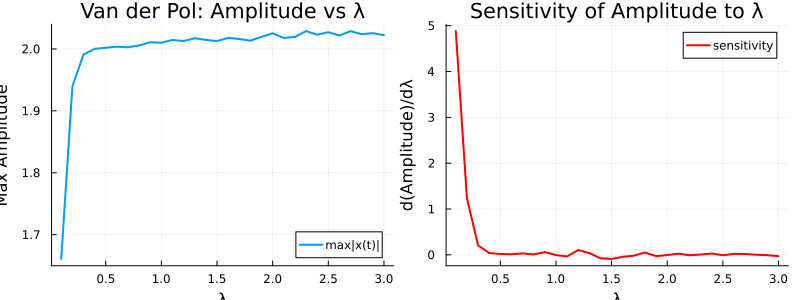

In [23]:
# Plot sensitivity across parameter range
λ_range = 0.1:0.1:3.0
amplitudes = [max_amplitude(λ) for λ in λ_range]
sensitivities = [ForwardDiff.derivative(max_amplitude, λ) for λ in λ_range]

p1 = plot(λ_range, amplitudes,
    xlabel="λ", ylabel="Max Amplitude",
    title="Van der Pol: Amplitude vs λ",
    label="max|x(t)|", linewidth=2)

p2 = plot(λ_range, sensitivities,
    xlabel="λ", ylabel="d(Amplitude)/dλ",
    title="Sensitivity of Amplitude to λ",
    label="sensitivity", linewidth=2, color=:red)

plot(p1, p2, layout=(1,2), size=(800, 300))

## 2.4 Machine Learning Integration (Take-Home Exercise)

Combine Modelica models with Julia's ML ecosystem (Flux.jl, Lux.jl).
You need to install Flux and Lux on your own to make this part of the tutorial work.
Since OMJL compiles Modelica to native Julia code, you can directly use Julia's ML libraries without inter-process communication or data serialization overhead.

### Take-Home Exercise: Neural Network Surrogate Model

**Goal:** Train a neural network to approximate the Van der Pol oscillator, creating a fast surrogate model.

**Why surrogates?**
- Physics simulations can be slow for real-time applications
- Neural networks provide fast inference once trained
- Useful for optimization, control, and uncertainty quantification

In [ ]:
# Step 1: Generate Training Data
using Random
Random.seed!(42)

function generate_vanderpol_data(n_samples=500)
    inputs = []   # (x0, y0, λ, t)
    outputs = []  # (x, y) at time t

    for _ in 1:n_samples
        x0 = randn() * 2
        y0 = randn() * 2
        λ = 0.5 + rand() * 2.0

        prob = ODEProblem(vanderpol!, [x0, y0], (0.0, 5.0), [λ])
        sol = solve(prob, Tsit5(), saveat=0.5)

        for (i, t) in enumerate(sol.t)
            push!(inputs, [x0, y0, λ, t])
            push!(outputs, sol.u[i])
        end
    end

    X = hcat(inputs...)'
    Y = hcat(outputs...)'
    return Float32.(X), Float32.(Y)
end

X_train, Y_train = generate_vanderpol_data(200)
println("Training data: $(size(X_train, 1)) samples")

In [ ]:
# Step 2: Define Neural Network
using Flux

surrogate_model = Chain(
    Dense(4 => 32, tanh),
    Dense(32 => 32, tanh),
    Dense(32 => 2)
)

loss(model, x, y) = Flux.mse(model(x'), y')

println("Model architecture:")
println(surrogate_model)
println("\nInitial loss: $(loss(surrogate_model, X_train, Y_train))")

In [ ]:
# Step 3: Train the Network
opt_state = Flux.setup(Adam(0.01), surrogate_model)

for epoch in 1:500
    grads = Flux.gradient(m -> loss(m, X_train, Y_train), surrogate_model)
    Flux.update!(opt_state, surrogate_model, grads[1])

    if epoch % 100 == 0
        current_loss = loss(surrogate_model, X_train, Y_train)
        println("Epoch $epoch: loss = $(round(current_loss, digits=5))")
    end
end

In [ ]:
# Step 4: Compare Surrogate vs Original
x0_test, y0_test, λ_test_ml = 1.5, 0.0, 1.5
tspan_test = (0.0, 10.0)

prob_test = ODEProblem(vanderpol!, [x0_test, y0_test], tspan_test, [λ_test_ml])
sol_test = solve(prob_test, Tsit5(), saveat=0.1)

t_points = sol_test.t
surrogate_pred = [surrogate_model([x0_test, y0_test, λ_test_ml, Float32(t)]) for t in t_points]
x_surrogate = [p[1] for p in surrogate_pred]

p_compare = plot(sol_test.t, sol_test[1,:], label="ODE x(t)", linewidth=2)
plot!(p_compare, t_points, x_surrogate, label="Surrogate x(t)", linestyle=:dash, linewidth=2)
plot!(p_compare, xlabel="Time", ylabel="x", title="Surrogate vs ODE Solution")

#### Exercise Tasks

**Task 1:** Improve the surrogate accuracy
- Try deeper networks or more neurons
- Train for more epochs
- Add more training data

**Task 2:** Test generalization
- Evaluate on λ values outside the training range
- Test with different initial conditions

**Task 3:** Measure speedup
- Compare inference time of surrogate vs ODE solve

**Task 4 (Advanced):** Physics-Informed Neural Network
- Add the ODE residual as a regularization term

---
# Part 3: Language Extensions

OMJL supports experimental Modelica language extensions for **variable-structure systems** - models where the equations themselves can change during simulation.

## 3.1 Why Variable-Structure Systems?

Many physical systems change their structure during operation:
- A pendulum that breaks and becomes a falling mass
- A clutch that engages/disengages
- Electrical circuits with switches
- Phase changes in thermodynamic systems

Standard Modelica handles some cases with `if` equations, but complex structural changes require recompilation.

## 3.2 Structural Modes

OMJL introduces the `structuralmode` keyword to define distinct model configurations.

```modelica
model SimpleTwoModes
  structuralmode Model1 mode1;
  structuralmode Model2 mode2;
equation
  initialStructuralState(mode1);
  structuralTransition(mode1, mode2, condition);
end SimpleTwoModes;
```

Key constructs:
- `structuralmode ModelType instanceName` - Declares a structural mode
- `initialStructuralState(mode)` - Sets the starting mode
- `structuralTransition(from, to, condition)` - Defines when to switch modes

## 3.3 The Breaking Pendulum

A classic variable-structure example: a pendulum that breaks and becomes a freely falling mass.

**Phase 1: Pendulum** - Constrained motion along an arc

**Phase 2: Free Fall** - Unconstrained motion in 2D

### Static Variable-Structure System

```modelica
model BreakingPendulumStatic
  structuralmode Pendulum pendulum;
  structuralmode FreeFall freeFall;
equation
  initialStructuralState(pendulum);
  structuralTransition(pendulum, freeFall, time <= 5);
end BreakingPendulumStatic;
```

┌ Warning: 
│  Assumed starting value of 0.0 for variable: pendulum_vx
│ 
│  Assumed starting value of 0.0 for variable: pendulum_vy
└ @ OMBackend.CodeGeneration ~/Projects/Julia/OM.jl/OMBackend.jl/src/CodeGeneration/MTK_CodeGeneration.jl:685
┌ Warning: 
│  Assumed starting value of 0.0 for variable: pendulum_phi
│ 
│  Assumed starting value of 0.0 for variable: pendulum_phid
└ @ OMBackend.CodeGeneration ~/Projects/Julia/OM.jl/OMBackend.jl/src/CodeGeneration/MTK_CodeGeneration.jl:685
┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/utils.jl:121
┌ Warning: The initialization system is structurally singular. Guess values may significantly affect the initial values of the ODE. The problematic variables are Any[pendulum_xˍt(t)].
│ 
│ Note that the identification of problematic variables is a best-effort heuristic.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/problems/initial

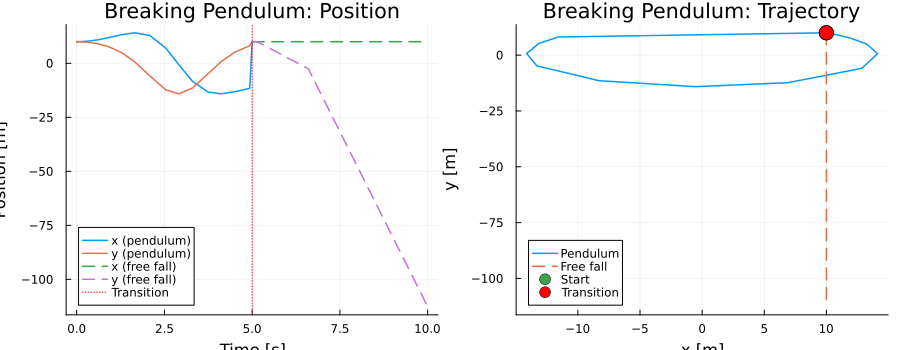

In [34]:
# Simulate the static breaking pendulum
breaking_pendulum_path = joinpath(@__DIR__, "..", "models", "BreakingPendulum.mo")

sol_bp = OM.simulate(
    "BreakingPendulum.BreakingPendulumStatic",
    breaking_pendulum_path;
    stopTime = 10.0,
    solver = Rodas5(autodiff = false)
)

# Solution has two parts: sol_bp[1] (pendulum) and sol_bp[2] (free fall)
# Variables are prefixed with mode name: pendulum_x, freeFall_x, etc.

# Extract data from both phases
t1, t2 = sol_bp[1].t, sol_bp[2].t
x1, x2 = sol_bp[1][:pendulum_x], sol_bp[2][:freeFall_x]
y1, y2 = sol_bp[1][:pendulum_y], sol_bp[2][:freeFall_y]

# Plot position over time - combine both phases
p_bp1 = plot(t1, x1, xlabel = "Time [s]", ylabel = "Position [m]",
    title = "Breaking Pendulum: Position", label = "x (pendulum)", linewidth = 1.5)
plot!(p_bp1, t1, y1, label = "y (pendulum)", linewidth = 1.5)
plot!(p_bp1, t2, x2, label = "x (free fall)", linewidth = 1.5, linestyle = :dash)
plot!(p_bp1, t2, y2, label = "y (free fall)", linewidth = 1.5, linestyle = :dash)
vline!(p_bp1, [5.0], label = "Transition", linestyle = :dot, color = :red)

# Plot trajectory in x-y plane - both phases
p_bp2 = plot(x1, y1, xlabel = "x [m]", ylabel = "y [m]",
    title = "Breaking Pendulum: Trajectory",
    label = "Pendulum", linewidth = 1.5)
plot!(p_bp2, x2, y2, label = "Free fall", linewidth = 1.5, linestyle = :dash)
scatter!(p_bp2, [x1[1]], [y1[1]], label = "Start", markersize = 8)
scatter!(p_bp2, [x2[1]], [y2[1]], label = "Transition", markersize = 8, color = :red)

plot(p_bp1, p_bp2, layout = (1, 2), size = (900, 350))

### Dynamic Recompilation

For more complex scenarios, OMJL supports runtime recompilation:

```modelica
model BreakingPendulumDynamic
  parameter Boolean breaks = false;
  FreeFall freeFall if breaks;
  Pendulum pendulum if not breaks;
equation
  when 5.0 <= time then
    recompilation(breaks, true);
  end when;
end BreakingPendulumDynamic;
```

The `recompilation(parameter, value)` function:
- Sets the parameter to the new value
- Triggers OMJL to regenerate and compile new equations at runtime

┌ Warning: 
│  Assumed starting value of 0.0 for variable: pendulum_vx
│ 
│  Assumed starting value of 0.0 for variable: pendulum_vy
└ @ OMBackend.CodeGeneration ~/Projects/Julia/OM.jl/OMBackend.jl/src/CodeGeneration/MTK_CodeGeneration.jl:685
┌ Warning: 
│  Assumed starting value of 0.0 for variable: pendulum_phi
│ 
│  Assumed starting value of 0.0 for variable: pendulum_phid
└ @ OMBackend.CodeGeneration ~/Projects/Julia/OM.jl/OMBackend.jl/src/CodeGeneration/MTK_CodeGeneration.jl:685
┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/utils.jl:121
┌ Warning: The initialization system is structurally singular. Guess values may significantly affect the initial values of the ODE. The problematic variables are Any[pendulum_xˍt(t)].
│ 
│ Note that the identification of problematic variables is a best-effort heuristic.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/peY7X/src/problems/initial

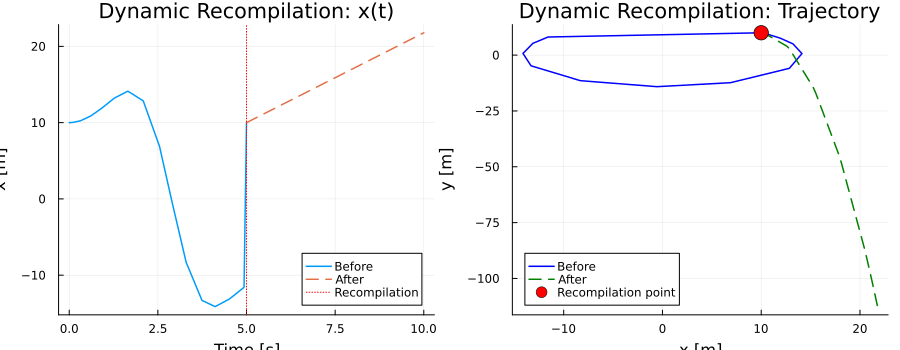

In [35]:
# Simulate the dynamic breaking pendulum (with recompilation)
sol_bp_dyn = OM.simulate(
    "BreakingPendulum.BreakingPendulumDynamic",
    breaking_pendulum_path;
    stopTime = 10.0,
    solver = Rodas5(autodiff = false)
)

# Solution has two parts: before and after recompilation
# Variables are prefixed with mode name: pendulum_x, freeFall_x, etc.

# Extract data from both phases
t1, t2 = sol_bp_dyn[1].t, sol_bp_dyn[2].t
x1, x2 = sol_bp_dyn[1][:pendulum_x], sol_bp_dyn[2][:freeFall_x]
y1, y2 = sol_bp_dyn[1][:pendulum_y], sol_bp_dyn[2][:freeFall_y]

# Plot x over time
p_dyn1 = plot(t1, x1, xlabel = "Time [s]", ylabel = "x [m]",
    title = "Dynamic Recompilation: x(t)",
    label = "Before", linewidth = 1.5)
plot!(p_dyn1, t2, x2, label = "After", linewidth = 1.5, linestyle = :dash)
vline!(p_dyn1, [5.0], label = "Recompilation", linestyle = :dot, color = :red)

# Plot trajectory
p_dyn2 = plot(x1, y1, xlabel = "x [m]", ylabel = "y [m]",
    title = "Dynamic Recompilation: Trajectory",
    label = "Before", linewidth = 1.5, color = :blue)
plot!(p_dyn2, x2, y2, label = "After", linewidth = 1.5, linestyle = :dash, color = :green)
scatter!(p_dyn2, [x2[1]], [y2[1]], label = "Recompilation point", markersize = 8, color = :red)

plot(p_dyn1, p_dyn2, layout = (1, 2), size = (900, 350))

## 3.4 State Transfer

When transitioning between modes, state variables with matching names are automatically transferred. In the breaking pendulum example, both `Pendulum` and `FreeFall` models share:
- `x`, `y` (position)
- `vx`, `vy` (velocity)

This allows seamless continuation of the simulation when the structure changes.

## 3.5 Other Extension Examples

OMJL's testsuite includes additional variable-structure examples:

- **IdealClutch** - Mechanical clutch engagement/disengagement
- **SimpleClock** - Discrete-time clock domains
- **ElectricalSwitch** - Circuit topology changes

---
# Summary

In this tutorial, we covered:

**Part 1: Modelica Basics**
- Variables, parameters, and equations
- Differential and algebraic equations
- Component-based modeling with MSL
- Hybrid systems with events

**Part 2: Julia-Modelica Integration**
- The OMJL compilation pipeline
- Parameter studies and sensitivity analysis
- ML integration: neural network surrogate models (take-home exercise)

**Part 3: Language Extensions**
- Variable-structure systems
- Structural modes and transitions
- Dynamic recompilation

## Resources

- [OMJL GitHub](https://github.com/OpenModelica/OM.jl)
- [Modelica Language Specification](https://modelica.org/documents)
- [DifferentialEquations.jl Documentation](https://docs.sciml.ai/)

---
*Tutorial created for MODPROD 2026*